<a href="https://colab.research.google.com/github/armeh429/A-journey-to-learn-Python-modules/blob/main/selleryar_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

     |████████████████████████████████| 266 kB 36.6 MB/s 
     |████████████████████████████████| 261 kB 54.5 MB/s 
     |████████████████████████████████| 56 kB 5.8 MB/s 
     |████████████████████████████████| 6.8 MB 62.6 MB/s 
     |████████████████████████████████| 1.7 MB 43.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 45.2 MB/s 
     |████████████████████████████████| 86 kB 6.4 MB/s 
     |████████████████████████████████| 113 kB 39.1 MB/s 
     |████████████████████████████████| 2.0 MB 53.6 MB/s 
     |████████████████████████████████| 16.9 MB 43 kB/s 
     |████████████████████████████████| 167 kB 49.3 MB/s 
     |████████████████████████████████| 3.1 MB 39.7 MB/s 
     |████████████████████████████████| 10.1 MB 45.4 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |███████████████████

In [ ]:
#First, we’ll use pandas to manipulate our data.
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#Next, we import ProfileReport from the pandas_profiling library with which we will use to quickly do an exploratory data analysis with just a one line of code
from pandas_profiling import ProfileReport

#Finally, we import the modules Clustering from the library PyCaret.
from pycaret.clustering import *
from pycaret.datasets import get_data
#PyCaret is a low-code Python Open-Source Machine Learning library
#The goal of PyCaret is to automate the major steps for building, evaluating and comparing ML models for classification and regression.

In [ ]:
data = pd.read_csv ('seller_data_4000.csv')
print(data)

      Unnamed: 0  seller_product_count  registration_date  cancellation_time  \
0              0                    20                 57               84.9   
1              1                    20                 57              100.0   
2              2                    20                 58              100.0   
3              3                    15                 57              100.0   
4              4                    20                 63              100.0   
...          ...                   ...                ...                ...   
3995        3995                    20                 35              100.0   
3996        3996                    20                 35              100.0   
3997        3997                    20                 35              100.0   
3998        3998                    20                 35              100.0   
3999        3999                    20                 35               96.2   

      ship_list  return_list  
0       

In [ ]:
seller_data = pd.DataFrame(data)

In [ ]:
seller_data.head()

Unnamed: 0  seller_product_count  registration_date  cancellation_time  \
0           0                    20                 57               84.9   
1           1                    20                 57              100.0   
2           2                    20                 58              100.0   
3           3                    15                 57              100.0   
4           4                    20                 63              100.0   

   ship_list  return_list  
0       67.9         96.2  
1      100.0        100.0  
2       99.1         99.8  
3      100.0         92.3  
4       98.5         98.9

In [ ]:
seller_data = seller_data[['seller_product_count' , 'registration_date' , 'cancellation_time','ship_list','return_list']]

In [ ]:
seller_data.head()

seller_product_count  registration_date  cancellation_time  ship_list  \
0                    20                 57               84.9       67.9   
1                    20                 57              100.0      100.0   
2                    20                 58              100.0       99.1   
3                    15                 57              100.0      100.0   
4                    20                 63              100.0       98.5   

   return_list  
0         96.2  
1        100.0  
2         99.8  
3         92.3  
4         98.9

In [ ]:
seller_data.dtypes

seller_product_count      int64
registration_date         int64
cancellation_time       float64
ship_list               float64
return_list             float64
dtype: object

In [ ]:
data = seller_data.sample(frac=0.95, random_state=123)
data_unseen = seller_data.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

In [ ]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

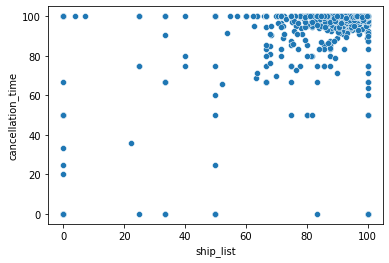

In [ ]:
sns.scatterplot(data=data, x="ship_list", y="cancellation_time")

In [ ]:
mySetup = setup(
    # Data
    data=data,
    
    ### The first optional parameter that we are going to change is session_id in order to reproduce the experiment.

    session_id=123,
    
    # Normalization
    ### Then we will normalize the data by using the parameter normalize = True.

    normalize = True,
    
    ### We will use the MINMAX normalization method

    normalize_method = 'minmax', #robust
    
    #Feature selection
    # The IGNORE_FEATURES parameter can be used two exclude a list of feature from the clustering modelelisation. 
    # We will exclude the 2 features CHANNEL and REGION
    #ignore_features =  ['Channel','Region'],
    
    
    ## MLFLOW
    # A great feature with PyCaret is the integration with MLFlow
    # We will change the paramtere log_experiment to TRUE: all metrics and parameters will be logged on MLFlow server.
    log_experiment = True,
    
    #We will also ste log_plots to TRUE so that specific plots are logged in MLflow as a png file.

    log_plots = True,

    # Lastly we will gave a name to the experiemtn which will be logegd int MLFLOW

    experiment_name = 'Clustering_DigiData'
    )
    
# Let's call the fuction (first moment of magic (WOW) from PyCaret)

Description                Value
0                               session_id                  123
1                            Original Data            (3800, 5)
2                           Missing Values                False
3                         Numeric Features                    5
4                     Categorical Features                    0
5                         Ordinal Features                False
6                High Cardinality Features                False
7                  High Cardinality Method                 None
8                         Transformed Data            (3800, 5)
9                                 CPU Jobs                   -1
10                                 Use GPU                False
11                          Log Experiment                 True
12                         Experiment Name  Clustering_DigiData
13                                     USI                 cf4c
14                         Imputation Type               simple
15          Iterative Imputation Iteration                 None
16                         Numeric Imputer                 mean
17      Iterative Imputation Numeric Model                 None
18                     Categorical Imputer                 mode
19  Iterative Imputation Categorical Model                 None
20           Unknown Categoricals Handling       least_frequent
21                               Normalize                 True
22                        Normalize Method               minmax
23                          Transformation                False
24                   Transformation Method                 None
25                                     PCA                False
26                              PCA Method                 None
27                          PCA Components                 None
28                     Ignore Low Variance                False
29                     Combine Rare Levels                False
30                    Rare Level Threshold                 None
31                         Numeric Binning                False
32                         Remove Outliers                False
33                      Outliers Threshold                 None
34                Remove Multicollinearity                False
35             Multicollinearity Threshold                 None
36             Remove Perfect Collinearity                False
37                              Clustering                False
38                    Clustering Iteration                 None
39                     Polynomial Features                False
40                       Polynomial Degree                 None
41                    Trignometry Features                False
42                    Polynomial Threshold                 None
43                          Group Features                False
44                       Feature Selection                False
45                Feature Selection Method              classic
46            Features Selection Threshold                 None
47                     Feature Interaction                False
48                           Feature Ratio                False
49                   Interaction Threshold                 None

In [ ]:
models()

Name                                          Reference
ID                                                                                            
kmeans                   K-Means Clustering                     sklearn.cluster._kmeans.KMeans
ap                     Affinity Propagation  sklearn.cluster._affinity_propagation.Affinity...
meanshift             Mean Shift Clustering              sklearn.cluster._mean_shift.MeanShift
sc                      Spectral Clustering       sklearn.cluster._spectral.SpectralClustering
hclust             Agglomerative Clustering  sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan     Density-Based Spatial Clustering                     sklearn.cluster._dbscan.DBSCAN
optics                    OPTICS Clustering                     sklearn.cluster._optics.OPTICS
birch                      Birch Clustering                       sklearn.cluster._birch.Birch
kmodes                   K-Modes Clustering                               kmodes.kmodes.KModes

In [ ]:
kmeans = create_model('kmeans')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0        0.67          5890.0978  ...           0             0

[1 rows x 6 columns]

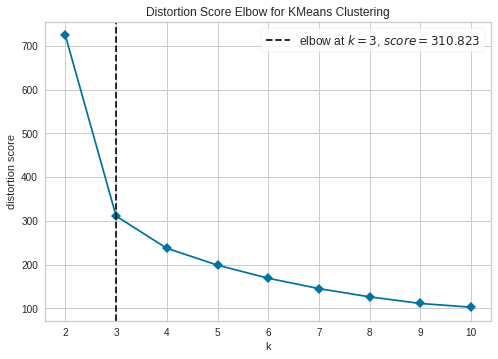

In [ ]:
plot_model(kmeans, plot = 'elbow')

In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [ ]:
kmeans = create_model('kmeans', num_clusters=3)

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.6553          6295.2063  ...           0             0

[1 rows x 6 columns]

In [ ]:
kmean_results = assign_model(kmeans)
kmean_results.head(20)

seller_product_count  registration_date  ...  return_list    Cluster
0                      7                 43  ...        100.0  Cluster 1
1                      7                 39  ...        100.0  Cluster 1
2                     20                 45  ...        100.0  Cluster 0
3                     20                 40  ...         91.2  Cluster 0
4                     20                 37  ...        100.0  Cluster 0
5                      8                 46  ...        100.0  Cluster 1
6                     19                 45  ...        100.0  Cluster 0
7                      1                 37  ...        100.0  Cluster 1
8                     11                 45  ...         99.1  Cluster 1
9                     20                 41  ...         98.6  Cluster 0
10                    20                 37  ...         99.5  Cluster 0
11                    17                 47  ...        100.0  Cluster 0
12                    20                 37  ...         99.6  Cluster 0
13                    20                 45  ...        100.0  Cluster 0
14                    20                 39  ...         99.7  Cluster 0
15                     1                 42  ...        100.0  Cluster 1
16                    20                 49  ...         99.5  Cluster 0
17                    20                 40  ...        100.0  Cluster 0
18                    20                 41  ...        100.0  Cluster 0
19                    20                 47  ...        100.0  Cluster 0

[20 rows x 6 columns]

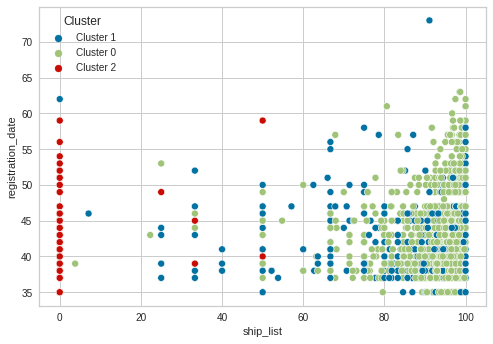

In [ ]:
sns.scatterplot(data=kmean_results, x="ship_list", y="registration_date", hue='Cluster')

In [ ]:
plot_model(kmeans)

In [ ]:
plot_model(kmeans, plot = 'tsne')

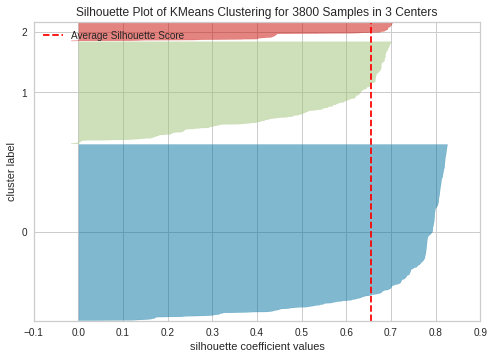

In [ ]:
plot_model(kmeans, plot = 'silhouette')

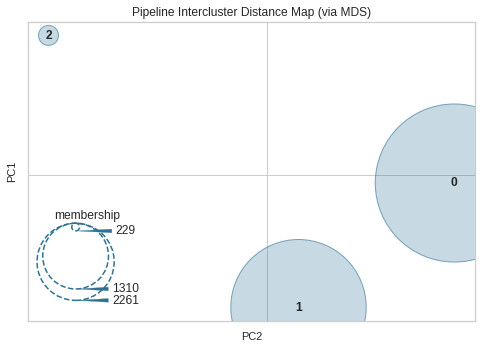

In [ ]:
plot_model(kmeans, plot = 'distance')

In [ ]:
plot_model(kmeans, plot = 'distribution') 

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'ship_list')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'cancellation_time')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'return_list')

In [ ]:
data_unseen.shape

(200, 5)

In [ ]:
save_model(kmeans, 'ModelFinalClustering')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  KMe

In [ ]:
saved_kmeans = load_model('ModelFinalClustering')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_kmeans, data=data_unseen)

In [ ]:
new_prediction.head()

seller_product_count  registration_date  ...  return_list    Cluster
0                    15                 57  ...         92.3  Cluster 0
1                    20                 63  ...         99.9  Cluster 0
2                     4                 55  ...        100.0  Cluster 1
3                     9                 56  ...        100.0  Cluster 1
4                    20                 53  ...        100.0  Cluster 0

[5 rows x 6 columns]